In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

### 1: Load the data

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 2: Handle the null values

In [6]:
df['Cabin'].fillna('NA', inplace = True)

In [7]:
X_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
y_cols = ['Survived']

In [8]:
df2 = df[X_cols + y_cols]

In [9]:
df2.dropna(inplace = True, axis = 0)

/tmp/ipykernel_5426/420888182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace = True, axis = 0)


#### 1. In the times of crisis, women and children are given higher priority over men by the rescue teams
#### 2. Economic status of a person is also a good indicator about the survival status of a person.

### 3: Converting text data into numbers

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
enc = OrdinalEncoder()

In [12]:
text_columns = ['Sex', 'Ticket', 'Cabin', 'Embarked']

In [13]:
for i in text_columns:
    enc = enc.fit(df2[[i]])
    df2[i] = enc.transform(df2[[i]])

/tmp/ipykernel_5426/3782195017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = enc.transform(df2[[i]])
/tmp/ipykernel_5426/3782195017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = enc.transform(df2[[i]])
/tmp/ipykernel_5426/3782195017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [14]:
X = df2[X_cols]
y = df2[y_cols]

### 4: Split DataFrame For Training and Testing

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
y_test = y_test['Survived'].values

### 5: Building Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

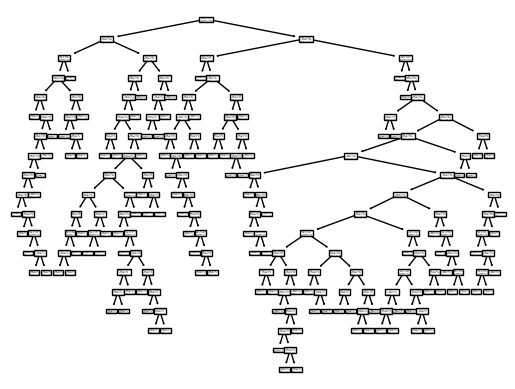

In [19]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

_ = plot_tree(dtree, feature_names=X_cols) 

### 6: Predictions on Test Data

In [20]:
y_pred = dtree.predict(X_test)

### 7: Measuring Classification

In [21]:
df_measuring_classification = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

In [22]:
matches = df_measuring_classification[
    df_measuring_classification['y_test'] == df_measuring_classification['y_pred']
]

In [23]:
matches.shape

(99, 2)

In [24]:
mis_matches = df_measuring_classification[
    df_measuring_classification['y_test'] != df_measuring_classification['y_pred']
]

In [25]:
mis_matches.shape

(44, 2)

### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[59, 21],
       [23, 40]])

In [28]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [29]:
Counter(y_test)

Counter({1: 63, 0: 80})

/home/ashish/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


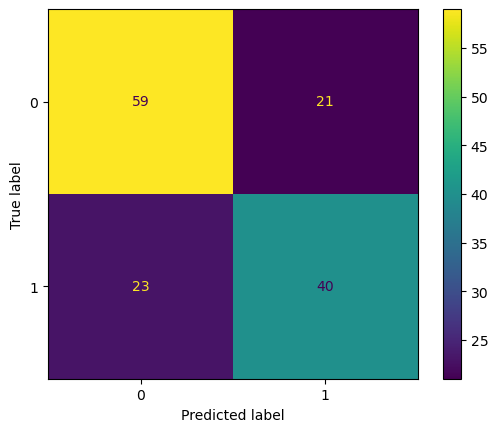

In [30]:
plot_confusion_matrix(dtree, X_test, y_test, values_format='d' )

In [31]:
from sklearn.metrics import recall_score

### Recall score for people who are predicted to be dead

In [32]:
recall_score(y_test, y_pred, average = 'binary', pos_label = 0)

0.7375

In [33]:
# True 0 & Predicted 0: 59
## True 0: 63 + 17 = 80

59/80

0.7375

### Precision score for people who are predicted to be dead

In [35]:
from sklearn.metrics import precision_score

In [37]:
precision_score(y_test, y_pred, average='binary', pos_label = 0)

0.735632183908046

In [38]:
TP = 63
# False 0 -> predicted 0 but actually 1
FP = 23

In [39]:
TP / (TP + FP)

0.7325581395348837

### Average Precision and Recall

In [40]:
recall_score(y_test, y_pred, average = 'micro')

0.7272727272727273

In [41]:
recall_score(y_test, y_pred, average = 'macro')

0.7174603174603175

In [42]:
recall_score(y_test, y_pred, average = 'weighted')

0.7272727272727273

In [43]:
from sklearn.metrics import precision_recall_fscore_support

In [45]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.7249589490968802, 0.7174603174603175, 0.7193679867156443, None)

In [46]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.73563218, 0.71428571]),
 array([0.8       , 0.63492063]),
 array([0.76646707, 0.67226891]),
 array([80, 63], dtype=int64))

### F1 Score